In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.stats as stm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r"C:\Users\kushp\Downloads\Stats_assignment_1.xlsx")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineBackup,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,2,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Yes,No,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [21]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService OnlineBackup TechSupport StreamingTV        Contract  \
0              No          Yes          No          N

The provided dataset consists of the informations below:

1.Demographic information about customers includes gender.

2.Customer account information including the number of months staying with the company, tenure, paperless billing, payment method and monthly charges.

3.Customer usage behavior as streaming TV.

4.Services that the customer signed up for: phone service,online backup and tech support.

5.Customer churn where the customer left within the last month.

 CATEGORICAL DATA:
 
-Customer ID
    
-Gender

-Senior Citizen
    
-Partner
 
-Dependents
    
-PhoneService
    
-OnlineBackup
    
-TechSuppot
    
-Contract
    
-PaperlessBilling
    
-PaymentMethod
    
-Churn

NUMERICAL DATA:
     
-Tenure
     
-MonthlyCharges

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   TechSupport       7043 non-null   object 
 9   StreamingTV       7043 non-null   object 
 10  Contract          7043 non-null   object 
 11  PaperlessBilling  7043 non-null   object 
 12  PaymentMethod     7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 825.5+ KB


We do not have any missing data and our data-types are in order. The majority of our data are of 'object' type, our categorical data. 

In [4]:
#summarizing data

data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen is actually categorical hence the 25%,50%,70% distribution is proper
We can conclude that 75% of people have tenure and average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month.

# Descriptive statistics for categorical variable

In [5]:
data.Churn.describe()

count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object

we conclude that the there are 7043 responses , 2 unique categorical values and 5174 is the frequency.

In [6]:
round(data["gender"].value_counts(normalize=True)*100,0)

Male      50.0
Female    50.0
Name: gender, dtype: float64

In [7]:
round(data['Churn'].value_counts(normalize=True)*100,0)

No     73.0
Yes    27.0
Name: Churn, dtype: float64

From the above output we conclude that our dataset is not balanced at all that is Yes is 27 around and No is 73 around. So we analyze the data with other features while taking the target values separately to get some insights.

In [8]:
round(data.groupby("Churn")["gender"].value_counts(100)*100,0)

Churn  gender
No     Male      51.0
       Female    49.0
Yes    Female    50.0
       Male      50.0
Name: gender, dtype: float64

C:\Users\kushp\anaconda3\New folder (2)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

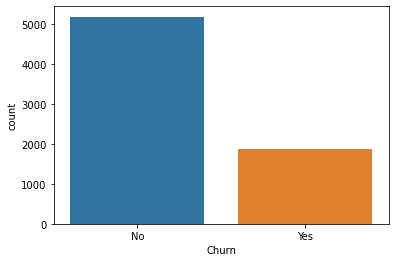

In [9]:
sns.countplot(data.Churn)

50% of customers churn with the response 'No' is high that is customer left within the last month

In [10]:
round(data["Contract"].value_counts(normalize=True)*100,0)

Month-to-month    55.0
Two year          24.0
One year          21.0
Name: Contract, dtype: float64

<AxesSubplot:>

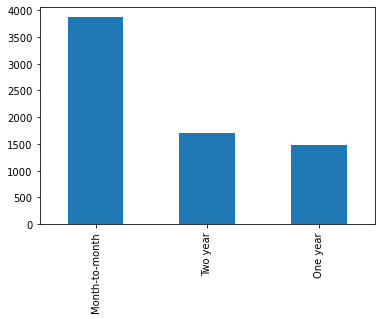

In [11]:
data["Contract"].value_counts().plot(kind="bar")

55% of people make Month-to-Month contract and yearly contract percentages are low so we have revice the offers for yearly contract

In [12]:
round(data["PaperlessBilling"].value_counts(normalize=True)*100,2)

Yes    59.22
No     40.78
Name: PaperlessBilling, dtype: float64

<AxesSubplot:>

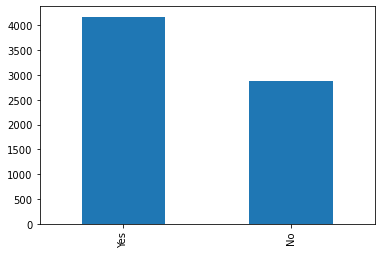

In [13]:
data["PaperlessBilling"].value_counts().plot(kind="bar")

59% of customer account information for paperlessbilling.

# Descriptive statistics for numerical data

In [14]:
from statsmodels.stats import descriptivestats

descriptivestats.describe(data.MonthlyCharges)

,MonthlyCharges
nobs,7.043000e+03
missing,0.000000e+00
mean,6.476169e+01
std_err,4.272334e-03
upper_ci,6.477007e+01
lower_ci,6.475332e+01
std,3.009005e+01
iqr,5.435000e+01
iqr_normal,4.028972e+01
mad,2.622210e+01


On average, people who pay for the service USD 64.76 and the most expensive charge monthly is USD 118.75. The cheapest monthly charge is USD 18.25.

<AxesSubplot:ylabel='tenure'>

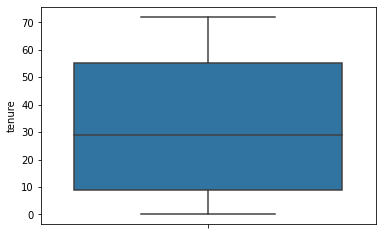

In [15]:
sns.boxplot(y=data.tenure)

By using the five point summary in visualisation we get that there are no outliers present in the above boxplot using seaborn.

Hence the lower side has no outliers then the minimum value and lower whisker line coincides and also in the upper side it has no outliers then the maximum value and upper whisker line coincides.

Since no outliers present, we consider that there is no experimental error or data point doesn't differs significantly from other observations. 

# Measure of location

In [19]:
#first quartile (Q1)
data.MonthlyCharges.quantile(0.25)

35.5

In [20]:
#second quartile (Q2)
data.MonthlyCharges.quantile(0.50)

70.35

In [21]:
#third quartile (Q3)
data.MonthlyCharges.quantile(0.75)

89.85

From the above results we conclude that quantile make it as generic function and the top 25% of customers paid the MonthlyCharges, 70.35 is the median of MonthlyCharges and 89% of customers paid the MonthlyCharges.

# Measure of central tendency

In [17]:
#Mean

data["MonthlyCharges"].mean()

64.76169246059922

64.76 is the least total error in the dataframe.

In [18]:
#Median

data["MonthlyCharges"].median()

70.35

70.35 indicates that the bulk of the data 'MonthlyCharges' have higher values which results to a higher median. The customers are paying their monthlycharges without any delay.

In [19]:
#Mode

data["MonthlyCharges"].mode()

0    20.05
Name: MonthlyCharges, dtype: float64

As mode takes in array form it indicates '0' , mode may not be single value sometimes more than one value then it gives in array format. 

From the above result we get that only 20% of the customers paid MonthlyCharges which not frequently used(that is only 20%).


# Measure of dispersion

In [28]:
#Range
range=data.tenure.max()-data.tenure.min()
range

72

In [29]:
#mean absolute deviation(MAD)
mad=data.tenure.mad()
mad

21.8730899289692

In [30]:
#Mean square deviation(MSD)- variance
data.tenure.var()

603.1681081237256

In [31]:
#Root mean square deviation(RMSD)- Standard deviation
data.tenure.std()

24.55948102309423

In [32]:
#coefficient of variation
cv=data.tenure.std()*100/data.tenure.mean()
cv

75.86842617906603

From the above results we conclude that approximately data is spread around central value.

In [34]:
#Measures of distribution shape - skweness and kurtosis
data.tenure.skew()

0.2395397495619829

From the result we conclude that skewness is weakly positive that is the average length of time individuals are employed by the organization are 23%.

In [35]:
data.tenure.kurt()

-1.387371635971685

From the above result we conclude that kurtosis is perfect negative that is the average length of time individuals are employed by the organization are 13.87%.

# Measure of location

In [36]:
data[["tenure","MonthlyCharges"]].corr()

,tenure,MonthlyCharges
tenure,1.0000,0.2479
MonthlyCharges,0.2479,1.0000


 The correlation between tenure and MonthlyCharges is 0.2479 which is weak positive ,amount of charges paid for the first full calendar month of the relevant service giving raise to claim.

C:\Users\kushp\anaconda3\New folder (2)\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

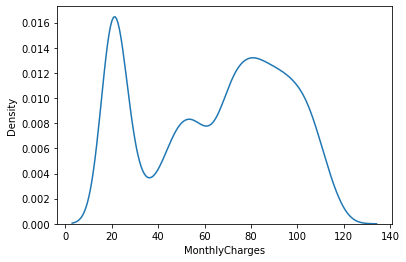

In [15]:
sns.distplot(data.MonthlyCharges,hist=False)

<AxesSubplot:>

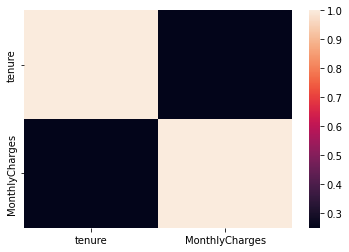

In [20]:
sns.heatmap(data[["tenure","MonthlyCharges"]].corr())

 From the above heat map we conclude that the highest correlation is between MonthlyCharge and tenure. The average length of time individuals are employed by the organization and amount of charges paid for the first full calendar month of the relevant service giving raise to claim.